In [1]:
# pyneurochem
import pyNeuroChem as pync
import pyaniasetools as aat
import pyanitools as pyt
import aniensemblestats as aes

import re

import hdnntools as hdt

import numpy as np

import matplotlib.pyplot as plt

import os

import pandas as pd

#import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fdir = '/home/jujuman/Research/extensibility_test_sets/s66x8/xyzfiles/'
#hfil = '/home/jujuman/Research/extensibility_test_sets/s66x8/s66x8_wb97x6-31gd.h5'
ndir = '/home/jujuman/Research/extensibility_test_sets/s66x8/structures/'

tex_store = "/home/jsmith48/scratch/extensibility_test_sets/COMP6v1/s66x8/ds66x8_ANI-9.0.4vsDFT_results.tex"

names = {'01':'water$\cdots$water',
         '02':'water$\cdots$MeOH',
         '03':'water$\cdots$MeNH$\mathrm{_2}$',
         '04':'water$\cdots$peptide',
         '05':'MeOH$\cdots$water',
         '06':'MeOH$\cdots$MeOH',
         '07':'MeOH$\cdots$MeNH$\mathrm{_2}$',
         '08':'MeOH$\cdots$peptide',
         '09':'MeNH$\mathrm{_2}$$\cdots$water',
         '10':'MeNH$\mathrm{_2}$$\cdots$MeOH',
         '11':'MeNH$\mathrm{_2}$$\cdots$MeNH$\mathrm{_2}$',
         '12':'MeNH$\mathrm{_2}$$\cdots$peptide',
         '13':'peptide$\cdots$water',
         '14':'peptide$\cdots$MeOH',
         '15':'peptide$\cdots$$\cdots$MeNH$\mathrm{_2}$',
         '16':'peptide$\cdots$peptide',
         '17':'uracil$\cdots$uracil (BP)',
         '18':'water$\cdots$pyridine',
         '19':'MeOH$\cdots$pyridine',
         '20':'AcOH$\cdots$AcOH',
         '21':'AcNH$\mathrm{_2}$$\cdots$AcNH$\mathrm{_2}$',
         '22':'AcOH$\cdots$uracil',
         '23':'AcNH$\mathrm{_2}$$\cdots$uracil',
         '24':'benzene$\cdots$benzene ($\pi-\pi$)',
         '25':'pyridine$\cdots$pyridine ($\pi-\pi$)',
         '26':'uracil$\cdots$uracil ($\pi-\pi$)',
         '27':'benzene$\cdots$pyridine ($\pi-\pi$)',
         '28':'benzene$\cdots$uracil ($\pi-\pi$)',
         '29':'pyridine$\cdots$ethene ($\pi-\pi$)',
         '30':'benzene$\cdots$ethene',
         '31':'uracil$\cdots$ethene',
         '32':'uracil$\cdots$ethyne',
         '33':'pyridine$\cdots$ethene',
         '34':'pentane$\cdots$pentane',
         '35':'neopentane$\cdots$pentane',
         '36':'neopentane$\cdots$neopentane',
         '37':'cyclopentane$\cdots$neopentane',
         '38':'cyclopentane$\cdots$cyclopentane',
         '39':'benzene$\cdots$cyclopentane',
         '40':'benzene$\cdots$neopentane',
         '41':'uracil$\cdots$pentane',
         '42':'uracil$\cdots$cyclopentane',
         '43':'uracil$\cdots$neopentane',
         '44':'ethene$\cdots$pentane',
         '45':'ethyne$\cdots$pentane',
         '46':'peptide$\cdots$pentane',
         '47':'benzene$\cdots$benzene (TS)',
         '48':'pyridine$\cdots$pyridine (TS)',
         '49':'benzene$\cdots$pyridine (TS)',
         '50':'benzene$\cdots$ethyne (CH-$\pi$)',
         '51':'ethyne$\cdots$ethyne (TS)',
         '52':'benzene$\cdots$AcOH (OH-$\pi$)',
         '53':'benzene$\cdots$AcNH$_{\mathrm{2}}$ (NH-$\pi$)',
         '54':'benzene$\cdots$water (OH-$\pi$)',
         '55':'benzene$\cdots$MeOH (OH-$\pi$)',
         '56':'benzene$\cdots$MeNH$_{\mathrm{2}}$ (NH-$\pi$)',
         '57':'benzene$\cdots$peptide (NH-$\pi$)',
         '58':'pyridine$\cdots$pyridine',
         '59':'ethyne$\cdots$water (CH-O)',
         '60':'ethyne$\cdots$AcOH (OH-$\pi$)',
         '61':'pentane$\cdots$AcOH',
         '62':'pentane$\cdots$AcNH$_{\mathrm{2}}$',
         '63':'benzene$\cdots$AcOH',
         '64':'peptide$\cdots$ethyne',
         '65':'pyridine$\cdots$ethyne',
         '66':'MeNH$_{\mathrm{2}}$$\cdots$pyridine',
        }

col_names = ['$\Delta E^{AvsD}_{MAE}$',
             '$\Delta E^{AvsD}_{RMS}$',
             '$\Delta E^{D}_{Rng}$',
             '$\Delta E^{AvsC}_{MAE}$',
             '$\Delta E^{AvsC}_{RMS}$',
             '$\Delta E^{C}_{Rng}$',
             '$\Delta E^{DvsC}_{MAE}$',
             '$\Delta E^{DvsC}_{RMS}$',
             '$\Delta E^{C}_{Rng}$.',]

splits = {'23': 'Hydrogen Bonding',
          '33': 'Pi stacking',
          '46': 'London dispersion complexes',
          '66': 'Mixed influence complexes'}
         

In [3]:
#wkdir1 = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
#cnstfile = 'rHCNO-4.6A_16-3.1A_a4-8.params'
#saefile  = 'sae_6-31gd.dat'
#wkdir1 = '/home/jsmith48/scratch/auto_al/modelCNOSFCl/ANI-AL-0808/ANI-AL-0808.0303/ANI-AL-0808.0303.0400/'
#cnstfile = 'train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
#saefile  = 'train0/sae_wb97x-631gd.dat'
#wkdir1 = '/home/jsmith48/scratch/auto_dim_al/modeldim/ANI-1x-DIM-0000/ANI-1x-DIM-0000.0039/'
#wkdir1 = '/home/jsmith48/scratch/auto_dim_al/modeldim/ANI-1x-DIM-0001/ANI-1x-DIM-0001.0021/'
wkdir1 = '/home/jsmith48/scratch/ANI-2x_retrain/train/ANI-2x_v62518/'
cnstfile = 'train0/rHCNOSFCl-5.2R_16-3.8A_a4-8.params'
#cnstfile = 'train0/rHCNO-5.2R_16-4.0A_a4-8.params'
saefile  = 'train0/sae_linfit.dat'
nnfdir   = '/train'
Nn = 8
anialcv = aat.anicrossvalidationconformer(wkdir1+cnstfile,wkdir1+saefile,wkdir1+nnfdir,Nn,[1],False)
#dpack = pyt.datapacker(hfil)

In [4]:
h5file = '/home/jsmith48/scratch/extensibility_test_sets/COMP6v1/s66x8/s66x8_wb97x6-31gd.h5'
adl = pyt.anidataloader(h5file)

In [5]:
cc_energies = '/home/jsmith48/scratch/extensibility_test_sets/COMP6v1/s66x8/ccsd_t_energies.dat'
f_read = open(cc_energies,'r').read()
reg = re.compile('(\d+?)\s.+?\((.+?)\).+?CP\s+?([+-]?\d+?(?:\.\d+?)?)(?:\n|$)')
matches = reg.findall(f_read)
Ecc_d = dict()
for i in matches:
    if i[0] in Ecc_d.keys():
        Ecc_d[i[0]].append(i[2])
    else:
        Ecc_d[i[0]] = [i[2]]

[0.23783138 0.25896884 0.25057136 0.19584769 0.1433213  0.09689273
 0.05115252 0.14370407] (8, 6, 3)


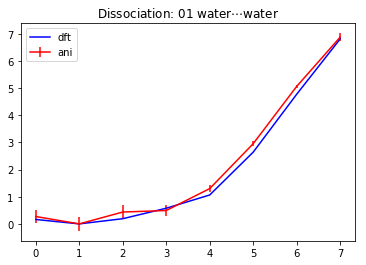

[0.21696519 0.20842337 0.21439762 0.19969462 0.19243825 0.17506267
 0.13940084 0.16902212] (8, 9, 3)


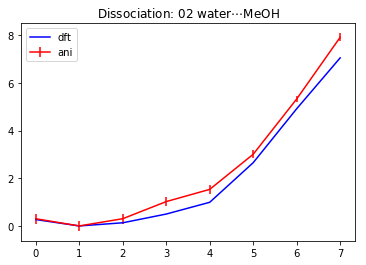

[0.17018967 0.15661493 0.19781975 0.24337572 0.25787392 0.15753875
 0.16709822 0.1001813 ] (8, 10, 3)


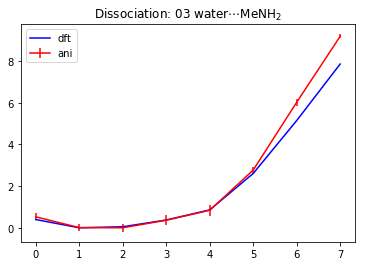

[0.24788545 0.22697541 0.22066736 0.22862287 0.21675418 0.15587401
 0.17023671 0.11521502] (8, 15, 3)


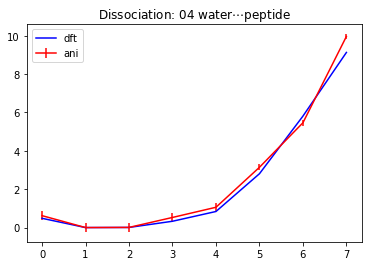

[0.30202108 0.30172677 0.27038235 0.2508185  0.21386714 0.22294414
 0.25864622 0.22425382] (8, 12, 3)


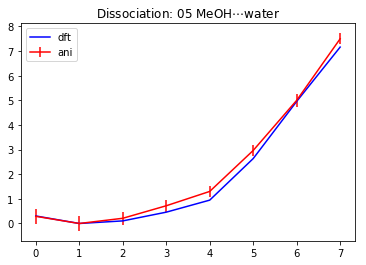

[0.2615771  0.22659102 0.21285112 0.19858642 0.16263874 0.2394085
 0.23487993 0.12181621] (8, 13, 3)


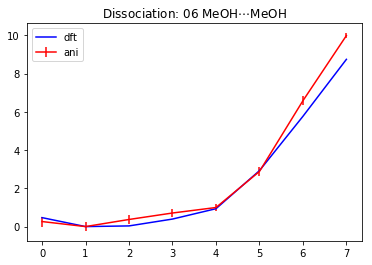

[0.1660092  0.15790406 0.16203207 0.17876737 0.18962867 0.16982636
 0.15746091 0.16605125] (8, 18, 3)


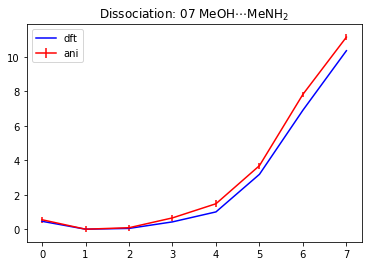

[0.24138722 0.21418107 0.17973863 0.15264255 0.12953498 0.14791398
 0.17554397 0.15571945] (8, 9, 3)


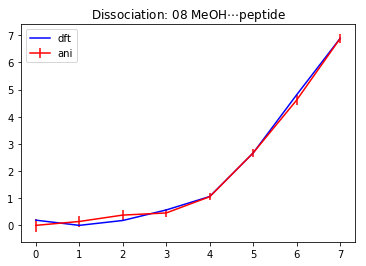

[0.11330759 0.10767889 0.11157677 0.133204   0.14175942 0.17957631
 0.14038838 0.11648548] (8, 13, 3)


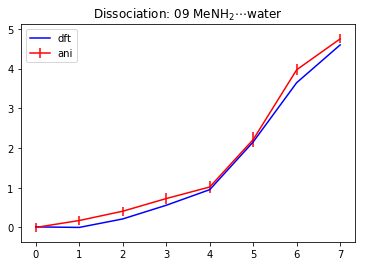

[0.10170055 0.11383477 0.12002886 0.13943037 0.14707278 0.16100642
 0.10053344 0.09259124] (8, 14, 3)


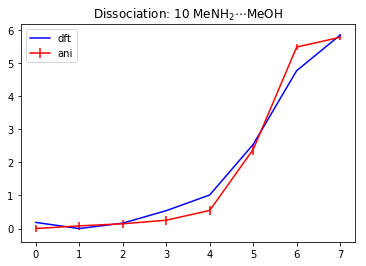

[0.14419948 0.113399   0.09340052 0.12193067 0.13948052 0.1671376
 0.11875443 0.11992975] (8, 19, 3)


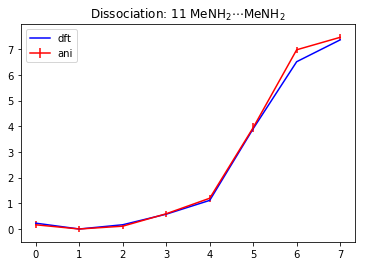

[0.26476538 0.20798256 0.22210292 0.20338569 0.18133777 0.18521816
 0.20334249 0.09604114] (8, 10, 3)


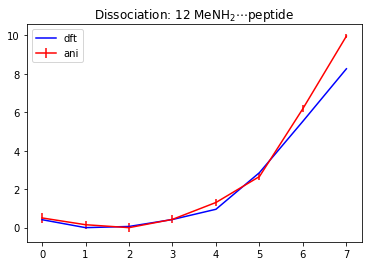

[0.17611069 0.14964085 0.1581503  0.1716191  0.17718248 0.16683494
 0.18040203 0.16585482] (8, 18, 3)


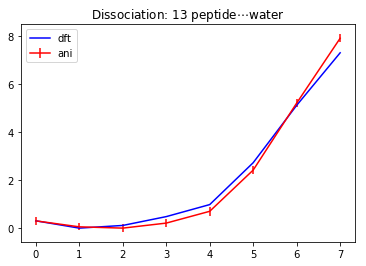

[0.13504729 0.13126599 0.16747878 0.19794313 0.20290638 0.18597553
 0.17808499 0.1122309 ] (8, 19, 3)


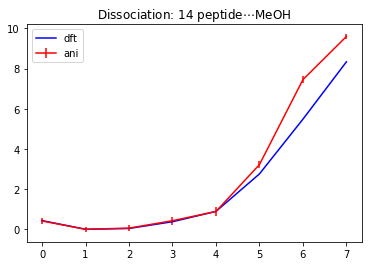

[0.15716266 0.17203982 0.1675432  0.16413195 0.15626127 0.15145301
 0.19926373 0.18354543] (8, 24, 3)


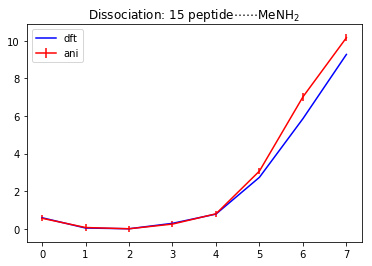

[0.15784042 0.14751271 0.1652568  0.16309734 0.17138898 0.23094294
 0.18971827 0.12854449] (8, 15, 3)


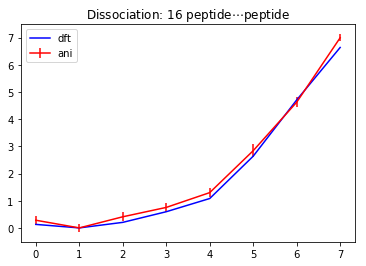

[0.2747488  0.28143801 0.26408366 0.27174211 0.27881363 0.2831297
 0.29769607 0.27979902] (8, 24, 3)


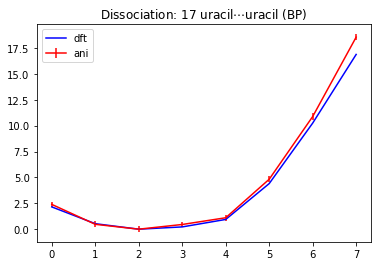

[0.3397415  0.32151667 0.26694077 0.24361411 0.22806728 0.16839417
 0.13175466 0.16356902] (8, 14, 3)


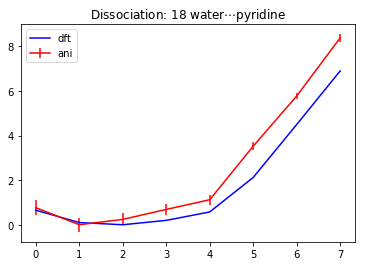

[0.22609721 0.2484799  0.21774754 0.19906254 0.18376152 0.17706374
 0.16331825 0.11191828] (8, 17, 3)


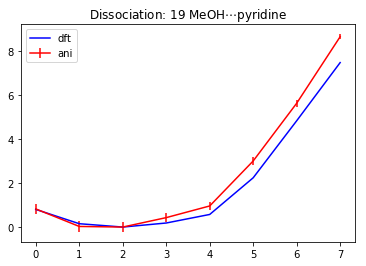

[0.22510334 0.1876408  0.20592826 0.20126231 0.17344193 0.1520254
 0.20150739 0.13560965] (8, 16, 3)


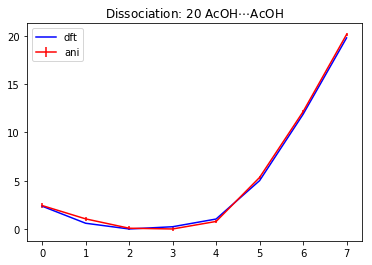

[0.24820606 0.22874011 0.1647675  0.14615644 0.15919912 0.13417563
 0.14090174 0.12192831] (8, 18, 3)


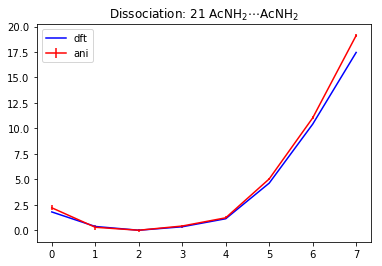

[0.24803376 0.24188835 0.23564686 0.21882003 0.1969178  0.1969027
 0.13564987 0.15342221] (8, 20, 3)


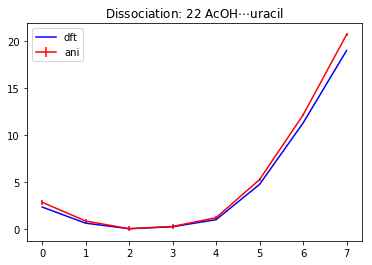

[0.15815754 0.15917681 0.16037718 0.14322497 0.15056996 0.13257356
 0.12447669 0.08729168] (8, 21, 3)
Hydrogen Bonding


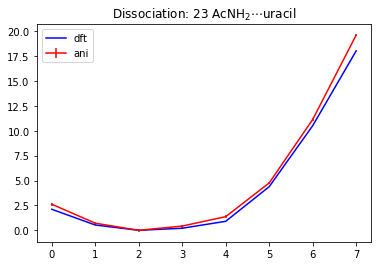

[0.14379023 0.16868111 0.26193626 0.22013162 0.24977259 0.18248029
 0.15578528 0.15575767] (8, 24, 3)


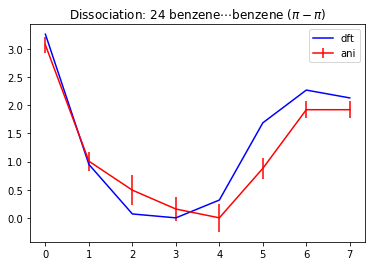

[0.21063897 0.22472219 0.2739861  0.30010269 0.25323835 0.22484911
 0.2108984  0.21023076] (8, 22, 3)


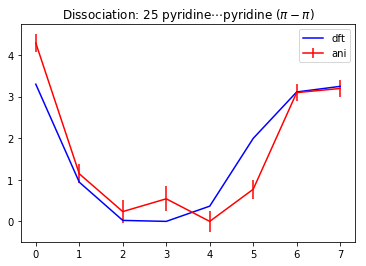

[0.23649009 0.22395386 0.22459459 0.23845207 0.25887654 0.24186487
 0.29734108 0.27703501] (8, 24, 3)


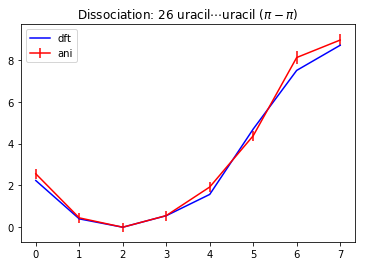

[0.18234607 0.16085829 0.16622627 0.18438911 0.17864843 0.159481
 0.1307664  0.13059151] (8, 23, 3)


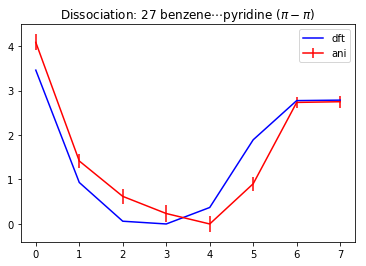

[0.16064867 0.14517475 0.11443293 0.17019213 0.12684729 0.12957616
 0.124796   0.13254627] (8, 24, 3)


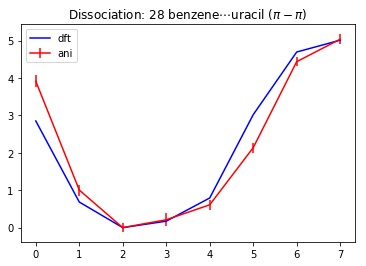

[0.26760387 0.22361382 0.16464152 0.15382611 0.1894736  0.17198782
 0.18351906 0.18991985] (8, 23, 3)


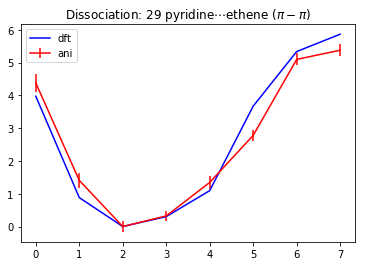

[0.13499611 0.21978304 0.24434951 0.14761411 0.1237986  0.11925639
 0.12760279 0.1276024 ] (8, 18, 3)


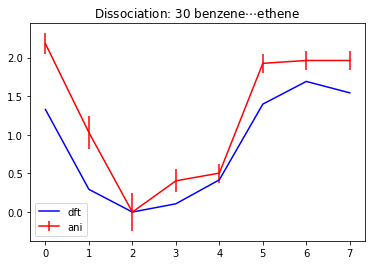

[0.21586675 0.16266998 0.1781498  0.18121349 0.18013826 0.1546945
 0.22545318 0.22151828] (8, 18, 3)


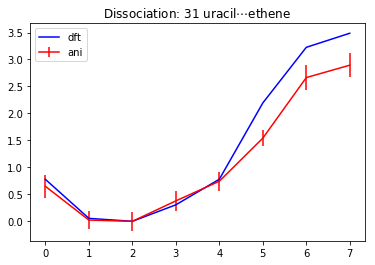

[0.18063052 0.15291343 0.14279747 0.13374951 0.11892962 0.16004767
 0.17341329 0.17150872] (8, 16, 3)


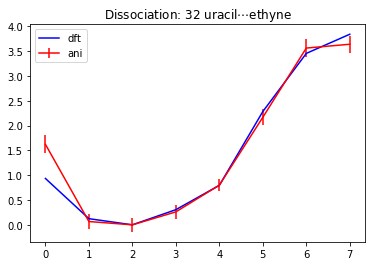

[0.10829517 0.0975694  0.1144456  0.07710813 0.06863558 0.10630984
 0.13702613 0.1364367 ] (8, 17, 3)
Pi stacking


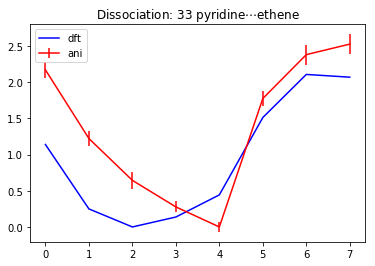

[0.30054801 0.31074118 0.29915195 0.28520631 0.26221234 0.16400408
 0.11011391 0.1195266 ] (8, 34, 3)


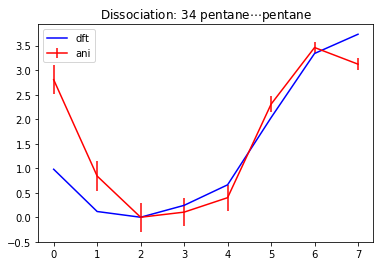

[0.23844273 0.21795255 0.20288965 0.17163397 0.13941714 0.15397564
 0.12665825 0.13171207] (8, 34, 3)


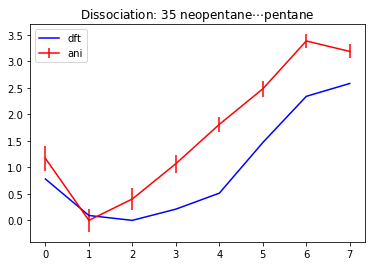

[0.24309927 0.23768934 0.19839852 0.16426549 0.15014704 0.20008924
 0.18889665 0.18915913] (8, 34, 3)


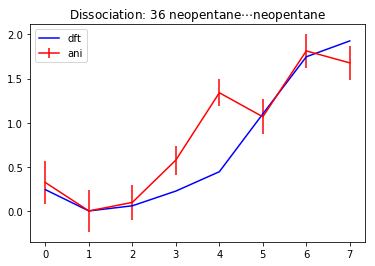

[0.16158732 0.16170254 0.14484702 0.12384435 0.0979223  0.11067192
 0.09759632 0.08513759] (8, 32, 3)


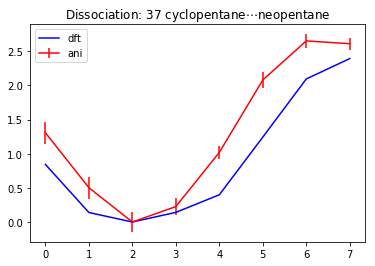

[0.17890566 0.18880512 0.15275831 0.14461322 0.16643706 0.16089136
 0.13068708 0.12377804] (8, 30, 3)


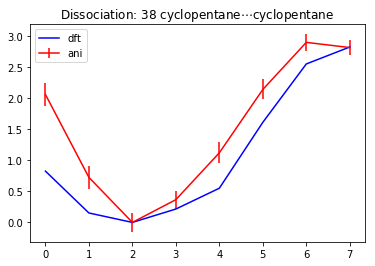

[0.10362567 0.08918862 0.10112822 0.12221827 0.1247182  0.10135975
 0.13428036 0.1241496 ] (8, 27, 3)


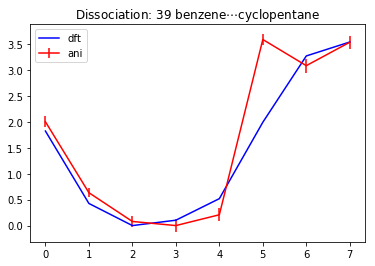

[0.10667835 0.09812077 0.12748426 0.13904293 0.11775901 0.12780915
 0.13696149 0.13179767] (8, 29, 3)


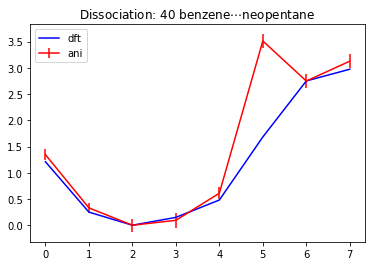

[0.18353838 0.18525366 0.1627346  0.15698408 0.14590262 0.09715094
 0.10318989 0.10070047] (8, 29, 3)


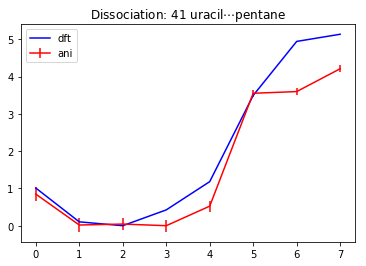

[0.11937506 0.13239658 0.16112618 0.15420529 0.12417382 0.1363823
 0.13254114 0.13515045] (8, 27, 3)


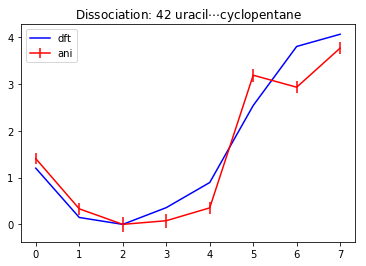

[0.22321793 0.18810737 0.16275191 0.15648262 0.15853105 0.14876531
 0.1458606  0.1437269 ] (8, 29, 3)


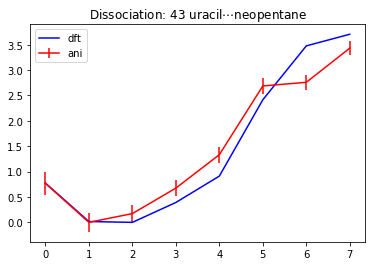

[0.18710261 0.16727358 0.15578775 0.13005605 0.1325921  0.13806645
 0.0920978  0.10602869] (8, 23, 3)


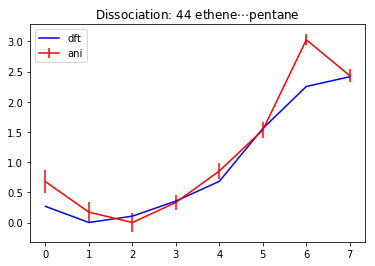

[0.25774567 0.15669587 0.11689145 0.11797206 0.15390601 0.20141353
 0.10583734 0.12465043] (8, 21, 3)


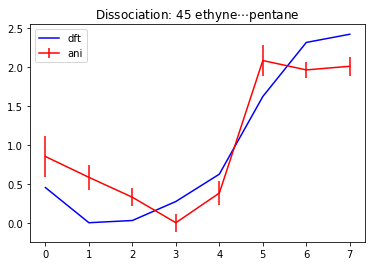

[0.17705296 0.1782362  0.19959713 0.21274287 0.20768908 0.15968378
 0.11727093 0.12469555] (8, 29, 3)
London dispersion complexes


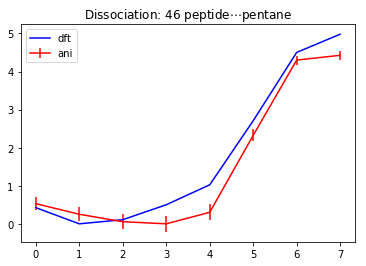

[0.11874434 0.10787854 0.06891993 0.12615413 0.16384378 0.17041119
 0.15604367 0.15569235] (8, 24, 3)


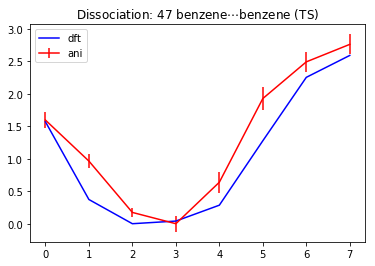

[0.14328989 0.20630235 0.21810365 0.20750314 0.19874778 0.25359793
 0.22067366 0.20885419] (8, 22, 3)


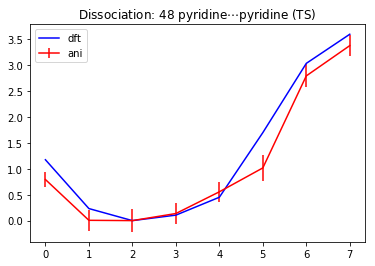

[0.09938893 0.17290531 0.11823043 0.13739404 0.10655313 0.17567393
 0.13936559 0.12999581] (8, 23, 3)


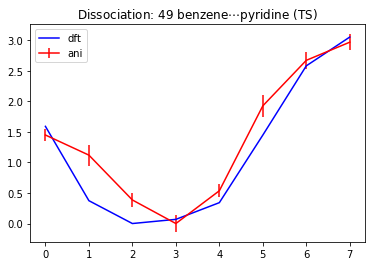

[0.31489349 0.17667143 0.20633725 0.19516307 0.22270627 0.17009291
 0.15676093 0.13534613] (8, 16, 3)


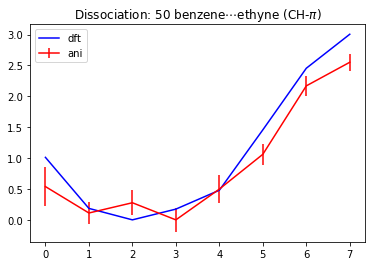

[0.36925459 0.31258584 0.26572113 0.24174919 0.28444737 0.22565208
 0.2800776  0.2813371 ] (8, 8, 3)


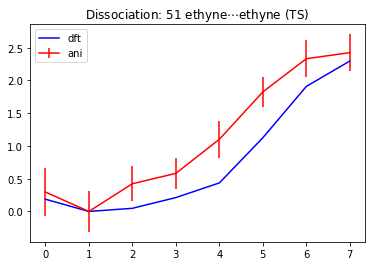

[0.21038555 0.15416105 0.13241897 0.09617228 0.09287279 0.09091282
 0.12623988 0.11489156] (8, 20, 3)


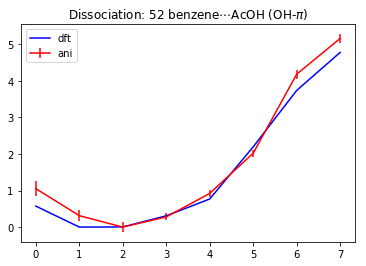

[0.10655613 0.13201153 0.16730627 0.15890847 0.15095007 0.11435468
 0.10555026 0.09871712] (8, 21, 3)


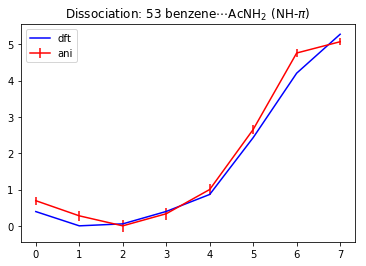

[0.21639672 0.19524598 0.13599214 0.13933141 0.09803403 0.12359367
 0.15516765 0.10829512] (8, 15, 3)


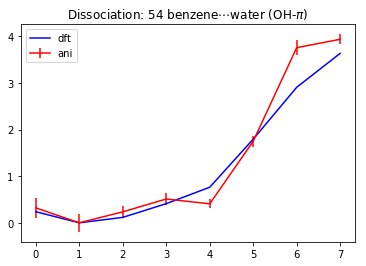

[0.27468322 0.2876541  0.26807218 0.25502858 0.21803273 0.19422525
 0.15787675 0.13845491] (8, 18, 3)


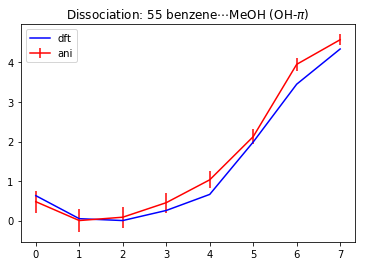

[0.13246758 0.15069096 0.14997256 0.1789389  0.17473465 0.09196332
 0.0960782  0.08043814] (8, 19, 3)


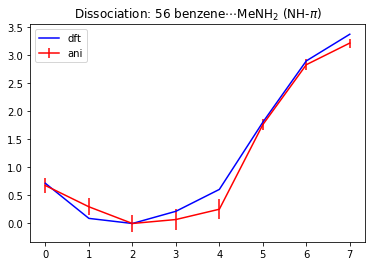

[0.1336361  0.16030221 0.17676855 0.1735707  0.17014941 0.135481
 0.15094542 0.14542276] (8, 24, 3)


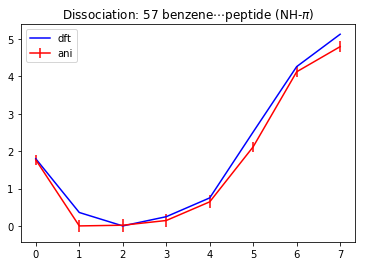

[0.25981518 0.23512221 0.23667411 0.25270395 0.25209729 0.18924529
 0.20620668 0.2081775 ] (8, 22, 3)


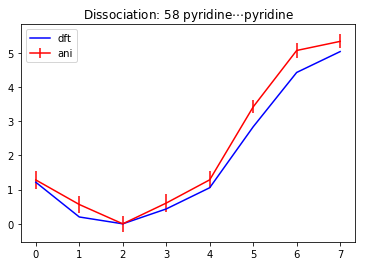

[0.24079976 0.23690676 0.21499938 0.18351152 0.16536671 0.19033204
 0.17080448 0.1930072 ] (8, 7, 3)


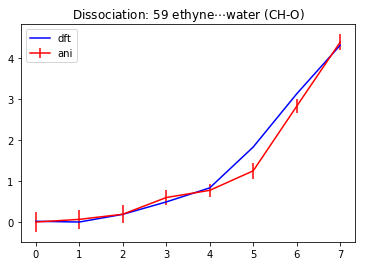

[0.17959373 0.1887584  0.23206284 0.24018049 0.20021635 0.10944321
 0.16182763 0.15997214] (8, 12, 3)


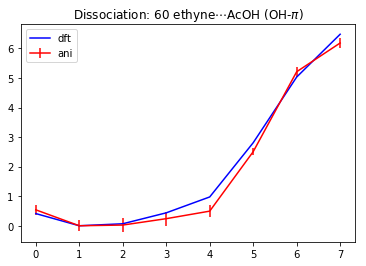

[0.1397849  0.15313469 0.16097013 0.15372629 0.11891911 0.08052243
 0.07317835 0.08398326] (8, 25, 3)


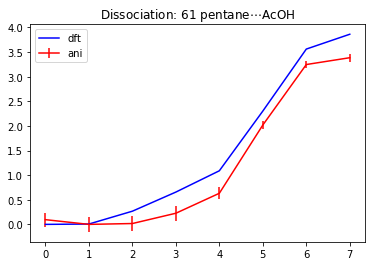

[0.12125311 0.13505391 0.1604145  0.18914283 0.20096638 0.15116738
 0.09934364 0.08754553] (8, 26, 3)


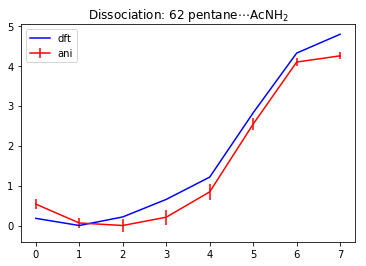

[0.15739003 0.1570394  0.16227079 0.11753916 0.08105191 0.11895356
 0.11036933 0.11755324] (8, 20, 3)


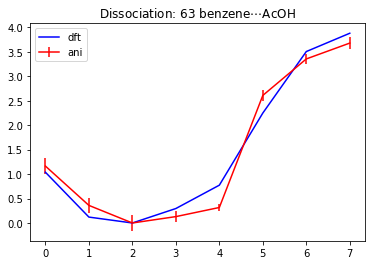

[0.2129821  0.20712726 0.16594112 0.15437953 0.1509907  0.1908979
 0.15478179 0.16987711] (8, 18, 3)


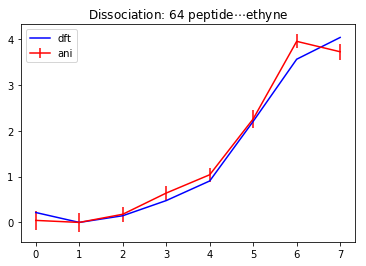

[0.19445356 0.19652772 0.14115326 0.15082771 0.20116049 0.27880893
 0.18218203 0.19710135] (8, 15, 3)


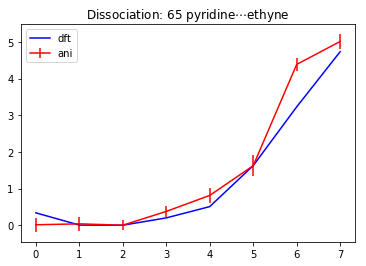

[0.22575194 0.22711076 0.21471341 0.17152296 0.15359791 0.15201718
 0.13821984 0.13113853] (8, 18, 3)
Mixed influence complexes


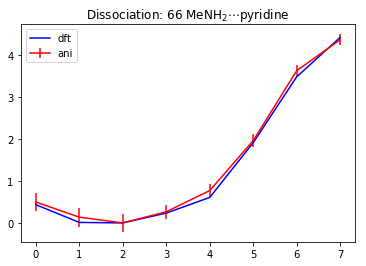

In [6]:
Eanit = []
Edftt = [] 

dEanit = []
dEdftt = []
dEcct = [] 

Fanit = []
Fdftt = [] 

tables = []
dframe = []
stats = dict()
for data in adl:
    idx = str(int(data['path'][-2:])+1).zfill(2)
    X = data['coordinates']
    S = data['species']
    Edft = hdt.hatokcal*data['energies']
    Fdft = hdt.hatokcal*data['forces'].flatten()
    #Fdft = np.zeros(X.shape).flatten()
    Ecc = np.asarray(Ecc_d[idx], dtype=np.float32)
    
    E,F,s = anialcv.compute_energyandforce_conformations(X=X,S=S,ensemble=False)
    Eani = np.mean(E,axis=0)
    print(np.std(E,axis=0)/np.sqrt(len(S)),X.shape)
    Fani = np.mean(F,axis=0).flatten()

    dEani = hdt.calculatedmat(Eani)
    dEdft = hdt.calculatedmat(Edft)
    dEcc  = hdt.calculatedmat(Ecc)
    
    name = names[idx]
    
    stats[idx+' '+name] = pd.Series({'ID'     : idx,
                             #'EMAE'   : hdt.calculatemeanabserror(Eani,Edft),
                             #'ERMS'   : hdt.calculaterootmeansqrerror(Eani,Edft),
                             #'ERNG'   : np.abs(Edft.max()-Edft.min()),
                             col_names[0] : hdt.calculatemeanabserror(dEani,dEdft),
                             col_names[1] : hdt.calculaterootmeansqrerror(dEani,dEdft),
                             col_names[2] : np.abs(dEdft.max()-dEdft.min()),
                             col_names[3] : hdt.calculatemeanabserror(dEani,dEcc),
                             col_names[4] : hdt.calculaterootmeansqrerror(dEani,dEcc),
                             col_names[5] : np.abs(dEcc.max()-dEcc.min()),
                             col_names[6] : hdt.calculatemeanabserror(dEdft,dEcc),
                             col_names[7] : hdt.calculaterootmeansqrerror(dEdft,dEcc),
                             col_names[8] : np.abs(dEcc.max()-dEcc.min()),
                             })
    
    Eanit.append(Eani)
    Edftt.append(Edft)
    dEanit.append(dEani)
    dEdftt.append(dEdft)
    dEcct.append(dEcc)
    Fanit.append(Fani.flatten())
    Fdftt.append(Fdft.flatten())

    if idx in splits:
        Eanit = np.concatenate(Eanit)
        Edftt = np.concatenate(Edftt)
        dEanit = np.concatenate(dEanit)
        dEdftt = np.concatenate(dEdftt)
        dEcct = np.concatenate(dEcct)
        #Fanit = np.concatenate(Fanit)
        #Fdftt = np.concatenate(Fdftt)
        
        stats['Total'] = pd.Series({'ID'     : idx,
                                    #'EMAE'   : hdt.calculatemeanabserror(Eanit,Edftt),
                                    #'ERMS'   : hdt.calculaterootmeansqrerror(Eanit,Edftt),
                                    #'ERNG'   : 'N/A',
                                    col_names[0] : hdt.calculatemeanabserror(dEanit,dEdftt),
                                    col_names[1] : hdt.calculaterootmeansqrerror(dEanit,dEdftt),
                                    col_names[2] : np.abs(dEdftt.max()-dEdftt.min()),
                                    col_names[3] : hdt.calculatemeanabserror(dEanit,dEcct),
                                    col_names[4] : hdt.calculaterootmeansqrerror(dEanit,dEcct),
                                    col_names[5] : np.abs(dEcct.max()-dEcct.min()),
                                    col_names[6] : hdt.calculatemeanabserror(dEdftt,dEcct),
                                    col_names[7] : hdt.calculaterootmeansqrerror(dEdftt,dEcct),
                                    col_names[8] : np.abs(dEcct.max()-dEcct.min()),
                                    #col_names[3] : hdt.calculatemeanabserror(Fanit,Fdftt),
                                    #col_names[4] : hdt.calculaterootmeansqrerror(Fanit,Fdftt),
                                    #col_names[5] : np.abs(Fdftt.max()-Fdftt.min()),
                                    })
        Eanit = []
        Edftt = [] 
        dEanit = []
        dEdftt = []
        dEcct = [] 
        #Fanit = []
        #Fdftt = []
        
        
        edat = pd.DataFrame(stats).transpose()
        #pd.set_option('precision',3)
        pd.set_option('display.max_rows', 66)
        pd.set_option('expand_frame_repr', False)
        edat = edat[['ID',
                     col_names[0],
                     col_names[1],
                     col_names[2],
                     col_names[3],
                     col_names[4],
                     col_names[5],
                     col_names[6],
                     col_names[7],
                     col_names[8]]].sort_values(['ID'])
        
        print(splits[idx])

        dframe.append((edat[[col_names[0],
                             col_names[1],
                             col_names[2],
                             col_names[3],
                             col_names[4],
                             col_names[5],
                             col_names[6],
                             col_names[7],
                             col_names[8],
                             ]], splits[idx]))

        tables.append((edat[[col_names[0],
                             col_names[1],
                             col_names[2],
                             col_names[3],
                             col_names[4],
                             col_names[5],
                             col_names[6],
                             col_names[7],
                             col_names[8],
                             ]].style, splits[idx]))
        stats = dict()
        
    plt.errorbar(np.arange(Eani.size),Eani-Eani.min(),c='r',yerr=np.std(E,axis=0)/np.sqrt(len(S)),label='ani')
    plt.plot(Edft-Edft.min(),c='b',label='dft')
    #plt.plot(Ecc-Ecc.min(),c='orange',label='cc')
    #plt.plot(Edft,Edft,c='b')
    #Eplt.scatter(Fani,Fdft,c='b')
    plt.legend()
    plt.title('Dissociation: ' + idx + ' ' + name)
    plt.show()
    

In [7]:
tables[0][0]

,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
01 water$\cdots$water,0.174431,0.205638,6.97666,1.28144,1.54011,4.34,1.21348,1.47869,4.34
02 water$\cdots$MeOH,0.345963,0.40924,7.31345,1.35012,1.63038,5,1.04967,1.28975,5
03 water$\cdots$MeNH$\mathrm{_2}$,0.527557,0.726079,8.25569,1.31786,1.7905,6.13,0.822092,1.07811,6.13
04 water$\cdots$peptide,0.380714,0.477191,9.61342,1.15141,1.57652,7.09,0.983057,1.30559,7.09
05 MeOH$\cdots$water,0.188558,0.225678,7.46745,1.19415,1.42539,5.21,1.07119,1.31121,5.21
06 MeOH$\cdots$MeOH,0.560122,0.691093,9.20853,1.4969,1.93644,6.84,1.03338,1.30596,6.84
07 MeOH$\cdots$MeNH$\mathrm{_2}$,0.416732,0.492661,10.8108,1.79778,2.22886,7.71,1.3977,1.77104,7.71
08 MeOH$\cdots$peptide,0.170546,0.202585,7.07946,1.21998,1.47312,4.5,1.24551,1.50446,4.5
09 MeNH$\mathrm{_2}$$\cdots$water,0.120681,0.145964,4.61031,0.996775,1.1915,2.88,0.946741,1.11842,2.88
10 MeNH$\mathrm{_2}$$\cdots$MeOH,0.381994,0.4959,6.0309,1.22923,1.54696,4.21,1.06001,1.2577,4.21


Total 00 	5.18910 	7.88987 	22.1323 	4.32924 	6.92707 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 01 	2.98390 	4.84293 	22.1323 	2.60133 	4.35488 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 02 	3.32826 	5.89396 	22.1323 	2.93406 	5.36695 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 03 	3.09339 	5.41673 	22.1323 	2.77553 	4.95342 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 04 	2.56479 	4.33544 	22.1323 	2.31754 	3.96047 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 08 	1.97829 	3.06633 	22.1323 	1.81573 	2.81555 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 10 	1.81731 	2.99785 	22.1323 	1.73644 	2.67147 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 20	1.08125	    1.71276	    22.1323	    1.38487	    1.89563	    17.14	1.09671	    1.4432	17.14 <br/>
Total 26	0.96935 	1.39607 	22.1323 	1.19939 	1.53641 	17.14 	1.09671 	1.4432 	17.14 <br/>
Total 34	0.89591	    1.26226 	22.1323	    1.26807	    1.65187	    17.14	1.09671  	1.4432	17.14

In [8]:
tables[1][0]

,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
24 benzene$\cdots$benzene ($\pi-\pi$),0.438833,0.526824,5.53063,0.560291,0.66093,5.31,0.43544,0.537938,5.31
25 pyridine$\cdots$pyridine ($\pi-\pi$),0.751782,0.923426,6.5457,0.870999,1.07734,6.16,0.404031,0.484631,6.16
26 uracil$\cdots$uracil ($\pi-\pi$),0.338256,0.404344,10.9274,0.536061,0.66405,10.79,0.449274,0.534412,10.79
27 benzene$\cdots$pyridine ($\pi-\pi$),0.634853,0.770922,6.24156,0.798986,0.947297,5.92,0.416813,0.515906,5.92
28 benzene$\cdots$uracil ($\pi-\pi$),0.613674,0.776006,7.86134,0.6947,0.95549,7.64,0.423636,0.506894,7.64
29 pyridine$\cdots$ethene ($\pi-\pi$),0.566821,0.670022,9.83373,0.773854,0.935145,9.35,0.485709,0.585016,9.35
30 benzene$\cdots$ethene,0.360611,0.420394,3.01911,0.466431,0.547564,2.57,0.26759,0.330175,2.57
31 uracil$\cdots$ethene,0.347112,0.43077,4.26391,0.252212,0.295032,3.94,0.412224,0.494079,3.94
32 uracil$\cdots$ethyne,0.270224,0.387319,4.77264,0.428284,0.502595,4.42,0.390394,0.46928,4.42
33 pyridine$\cdots$ethene,0.565175,0.676719,3.24913,0.518116,0.638762,2.78,0.299049,0.366284,2.78


Total 00 	22.6304 	30.5184 	12.6679 	22.6271 	30.6113 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 01 	3.76753 	4.76150 	12.6679 	3.69730 	4.74691 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 02 	3.00262 	3.78157 	12.6679 	2.93157 	3.74582 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 03 	2.87060 	3.59906 	12.6679 	2.81867 	3.58869 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 04 	2.65874 	3.26267 	12.6679 	2.59473 	3.21111 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 08 	1.56052 	1.92489 	12.6679 	1.54765 	1.91996 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 10	1.53560 	1.90336 	12.6679 	1.50912 	1.87766 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 20	1.31314	    1.60416	    12.6679	    1.26950	    1.59705	    11.9	0.398416	0.488129	11.9 <br/>
Total 26	1.22854 	1.53083 	12.6679 	1.24083 	1.57547 	11.9 	0.398416 	0.488129 	11.9 <br/>
Total 34	0.70302     0.88832 	12.6679 	0.69790 	0.93595	    11.9	0.398416	0.488129	11.9

In [9]:
tables[2][0]

,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
34 pentane$\cdots$pentane,0.833845,1.06145,4.71125,0.829754,1.03574,4.41,0.274232,0.335212,4.41
35 neopentane$\cdots$pentane,0.538605,0.636464,3.36208,0.694889,0.822896,3.19,0.195007,0.237118,3.19
36 neopentane$\cdots$neopentane,0.364353,0.488395,2.16805,0.437565,0.547478,1.95,0.240637,0.278314,1.95
37 cyclopentane$\cdots$neopentane,0.34456,0.400282,3.23557,0.476367,0.555581,3.02,0.174351,0.209514,3.02
38 cyclopentane$\cdots$cyclopentane,0.463761,0.574324,3.64377,0.530535,0.63022,3.56,0.157432,0.195128,3.56
39 benzene$\cdots$cyclopentane,0.579858,0.845259,5.35813,0.733459,1.02082,4.79,0.27175,0.3279,4.79
40 benzene$\cdots$neopentane,0.515358,0.889913,4.18299,0.725622,1.07672,3.73,0.261581,0.318589,3.73
41 uracil$\cdots$pentane,0.594484,0.71464,6.14561,0.461803,0.701725,5.64,0.541359,0.660399,5.64
42 uracil$\cdots$cyclopentane,0.573717,0.675387,5.25774,0.522514,0.734982,4.96,0.321039,0.398867,4.96
43 uracil$\cdots$neopentane,0.421573,0.521016,4.47904,0.495857,0.615199,4.3,0.387265,0.462393,4.3


Total 00 	4.88699 	9.27182 	6.95674 	4.75024 	9.13855 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 01 	1.17619 	1.57892 	6.95674 	1.09947 	1.44207 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 02 	1.17684 	1.61516 	6.95674 	1.18587 	1.57435 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 03 	1.07586 	1.41532 	6.95674 	1.00379 	1.30155 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 04 	1.13881 	1.49272 	6.95674 	1.06291 	1.38029 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 08 	1.05693 	1.42321 	6.95674 	1.01496 	1.33557 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 10	0.98317 	1.31232 	6.95674 	0.96491 	1.25838 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 20	0.94021	    1.23685	    6.95674	    0.86193 	1.10958	    6.04	0.341173	0.448028	6.04 <br/>
Total 26 	0.80529 	1.06377 	6.95674 	0.77006 	0.98521 	6.04 	0.341173 	0.448028 	6.04 <br/>
Total 34	0.60555	0.78739	    6.95674	    0.56191 	0.72115 	6.04	0.341173	0.448028	6.04

In [10]:
tables[3][0]

,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
47 benzene$\cdots$benzene (TS),0.295499,0.350833,4.15805,0.349553,0.410346,3.88,0.160714,0.193058,3.88
48 pyridine$\cdots$pyridine (TS),0.296328,0.359989,4.77134,0.296207,0.351748,4.16,0.295956,0.35988,4.16
49 benzene$\cdots$pyridine (TS),0.375017,0.444838,4.64749,0.379975,0.449163,4.22,0.166124,0.201139,4.22
50 benzene$\cdots$ethyne (CH-$\pi$),0.310224,0.368804,4.01703,0.268524,0.331048,3.58,0.243864,0.289532,3.58
51 ethyne$\cdots$ethyne (TS),0.306181,0.36182,2.48214,0.63438,0.747786,1.69,0.476329,0.565318,1.69
52 benzene$\cdots$AcOH (OH-$\pi$),0.294784,0.346005,5.35311,0.488004,0.59483,4.88,0.42982,0.505465,4.88
53 benzene$\cdots$AcNH$_{\mathrm{2}}$ (NH-$\pi$),0.293425,0.34694,5.66782,0.837974,1.0307,4.45,0.795972,0.943367,4.45
54 benzene$\cdots$water (OH-$\pi$),0.37684,0.48854,3.87386,0.716986,0.877717,3.32,0.466944,0.543124,3.32
55 benzene$\cdots$MeOH (OH-$\pi$),0.256429,0.299916,4.97206,0.656207,0.763169,4.41,0.430429,0.508459,4.41
56 benzene$\cdots$MeNH$_{\mathrm{2}}$ (NH-$\pi$),0.180031,0.224124,4.07953,0.291293,0.350506,3.69,0.303707,0.359161,3.69


Total 00 	12.5559 	17.4681 	8.27387 	12.1069 	17.0861 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 01 	1.71012 	2.43267 	8.27387 	1.60083 	2.29180 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 02 	1.72413 	2.39958 	8.27387 	1.76979 	2.40737 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 03 	1.31026 	1.80011 	8.27387 	1.30767 	1.74062 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 04 	1.26473 	1.70545 	8.27387 	1.30227 	1.72270 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 08    0.92000 	1.21107 	8.27387 	0.89735 	1.17159 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 10	0.76798 	0.97818 	8.27387 	0.89216 	1.15259 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 20	0.76706  	0.98600	    8.27387	    0.92421	    1.22055  	6.19	0.533956	0.704351	6.19 <br/>
Total 26	0.77971 	1.00518 	8.27387 	0.92946 	1.26799 	6.19 	0.533956 	0.704351 	6.19 <br/>
Total 34	0.46451	    0.63341	    8.27387	    0.71586	    0.94778	    6.19	0.533956	0.704351	6.19

In [11]:
# Build latex document
header = r'\documentclass{article}'+'\n'+r'\usepackage{booktabs}'+'\n'+r'\usepackage[margin=1.0in]{geometry}'+'\n'+r'\begin{document}'+'\n'

begtab = r'\begin{table}'+'\n'+r'\centering'+'\n'
endtab = r'\end{table}'+'\n'
enddoc = r'\end{document}'
with open(tex_store, "w") as text_file:
    text_file.write(header)
    for tup in dframe:
        text_file.write(begtab+r'\caption{'+tup[1]+r'}'+'\n'+tup[0].to_latex(escape=False)+endtab)
    text_file.write(enddoc)

In [12]:
tables[0][0]

,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
01 water$\cdots$water,0.174431,0.205638,6.97666,1.28144,1.54011,4.34,1.21348,1.47869,4.34
02 water$\cdots$MeOH,0.345963,0.40924,7.31345,1.35012,1.63038,5,1.04967,1.28975,5
03 water$\cdots$MeNH$\mathrm{_2}$,0.527557,0.726079,8.25569,1.31786,1.7905,6.13,0.822092,1.07811,6.13
04 water$\cdots$peptide,0.380714,0.477191,9.61342,1.15141,1.57652,7.09,0.983057,1.30559,7.09
05 MeOH$\cdots$water,0.188558,0.225678,7.46745,1.19415,1.42539,5.21,1.07119,1.31121,5.21
06 MeOH$\cdots$MeOH,0.560122,0.691093,9.20853,1.4969,1.93644,6.84,1.03338,1.30596,6.84
07 MeOH$\cdots$MeNH$\mathrm{_2}$,0.416732,0.492661,10.8108,1.79778,2.22886,7.71,1.3977,1.77104,7.71
08 MeOH$\cdots$peptide,0.170546,0.202585,7.07946,1.21998,1.47312,4.5,1.24551,1.50446,4.5
09 MeNH$\mathrm{_2}$$\cdots$water,0.120681,0.145964,4.61031,0.996775,1.1915,2.88,0.946741,1.11842,2.88
10 MeNH$\mathrm{_2}$$\cdots$MeOH,0.381994,0.4959,6.0309,1.22923,1.54696,4.21,1.06001,1.2577,4.21


In [13]:
tables[1][0]

,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
24 benzene$\cdots$benzene ($\pi-\pi$),0.438833,0.526824,5.53063,0.560291,0.66093,5.31,0.43544,0.537938,5.31
25 pyridine$\cdots$pyridine ($\pi-\pi$),0.751782,0.923426,6.5457,0.870999,1.07734,6.16,0.404031,0.484631,6.16
26 uracil$\cdots$uracil ($\pi-\pi$),0.338256,0.404344,10.9274,0.536061,0.66405,10.79,0.449274,0.534412,10.79
27 benzene$\cdots$pyridine ($\pi-\pi$),0.634853,0.770922,6.24156,0.798986,0.947297,5.92,0.416813,0.515906,5.92
28 benzene$\cdots$uracil ($\pi-\pi$),0.613674,0.776006,7.86134,0.6947,0.95549,7.64,0.423636,0.506894,7.64
29 pyridine$\cdots$ethene ($\pi-\pi$),0.566821,0.670022,9.83373,0.773854,0.935145,9.35,0.485709,0.585016,9.35
30 benzene$\cdots$ethene,0.360611,0.420394,3.01911,0.466431,0.547564,2.57,0.26759,0.330175,2.57
31 uracil$\cdots$ethene,0.347112,0.43077,4.26391,0.252212,0.295032,3.94,0.412224,0.494079,3.94
32 uracil$\cdots$ethyne,0.270224,0.387319,4.77264,0.428284,0.502595,4.42,0.390394,0.46928,4.42
33 pyridine$\cdots$ethene,0.565175,0.676719,3.24913,0.518116,0.638762,2.78,0.299049,0.366284,2.78


In [14]:
print(tables[2])
tables[2][0]

(<pandas.io.formats.style.Styler object at 0x2ab1f7ea6668>, 'London dispersion complexes')


,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
34 pentane$\cdots$pentane,0.833845,1.06145,4.71125,0.829754,1.03574,4.41,0.274232,0.335212,4.41
35 neopentane$\cdots$pentane,0.538605,0.636464,3.36208,0.694889,0.822896,3.19,0.195007,0.237118,3.19
36 neopentane$\cdots$neopentane,0.364353,0.488395,2.16805,0.437565,0.547478,1.95,0.240637,0.278314,1.95
37 cyclopentane$\cdots$neopentane,0.34456,0.400282,3.23557,0.476367,0.555581,3.02,0.174351,0.209514,3.02
38 cyclopentane$\cdots$cyclopentane,0.463761,0.574324,3.64377,0.530535,0.63022,3.56,0.157432,0.195128,3.56
39 benzene$\cdots$cyclopentane,0.579858,0.845259,5.35813,0.733459,1.02082,4.79,0.27175,0.3279,4.79
40 benzene$\cdots$neopentane,0.515358,0.889913,4.18299,0.725622,1.07672,3.73,0.261581,0.318589,3.73
41 uracil$\cdots$pentane,0.594484,0.71464,6.14561,0.461803,0.701725,5.64,0.541359,0.660399,5.64
42 uracil$\cdots$cyclopentane,0.573717,0.675387,5.25774,0.522514,0.734982,4.96,0.321039,0.398867,4.96
43 uracil$\cdots$neopentane,0.421573,0.521016,4.47904,0.495857,0.615199,4.3,0.387265,0.462393,4.3


In [15]:
tables[3][0]

,$\Delta E^{AvsD}_{MAE}$,$\Delta E^{AvsD}_{RMS}$,$\Delta E^{D}_{Rng}$,$\Delta E^{AvsC}_{MAE}$,$\Delta E^{AvsC}_{RMS}$,$\Delta E^{C}_{Rng}$,$\Delta E^{DvsC}_{MAE}$,$\Delta E^{DvsC}_{RMS}$,$\Delta E^{C}_{Rng}$.
47 benzene$\cdots$benzene (TS),0.295499,0.350833,4.15805,0.349553,0.410346,3.88,0.160714,0.193058,3.88
48 pyridine$\cdots$pyridine (TS),0.296328,0.359989,4.77134,0.296207,0.351748,4.16,0.295956,0.35988,4.16
49 benzene$\cdots$pyridine (TS),0.375017,0.444838,4.64749,0.379975,0.449163,4.22,0.166124,0.201139,4.22
50 benzene$\cdots$ethyne (CH-$\pi$),0.310224,0.368804,4.01703,0.268524,0.331048,3.58,0.243864,0.289532,3.58
51 ethyne$\cdots$ethyne (TS),0.306181,0.36182,2.48214,0.63438,0.747786,1.69,0.476329,0.565318,1.69
52 benzene$\cdots$AcOH (OH-$\pi$),0.294784,0.346005,5.35311,0.488004,0.59483,4.88,0.42982,0.505465,4.88
53 benzene$\cdots$AcNH$_{\mathrm{2}}$ (NH-$\pi$),0.293425,0.34694,5.66782,0.837974,1.0307,4.45,0.795972,0.943367,4.45
54 benzene$\cdots$water (OH-$\pi$),0.37684,0.48854,3.87386,0.716986,0.877717,3.32,0.466944,0.543124,3.32
55 benzene$\cdots$MeOH (OH-$\pi$),0.256429,0.299916,4.97206,0.656207,0.763169,4.41,0.430429,0.508459,4.41
56 benzene$\cdots$MeNH$_{\mathrm{2}}$ (NH-$\pi$),0.180031,0.224124,4.07953,0.291293,0.350506,3.69,0.303707,0.359161,3.69


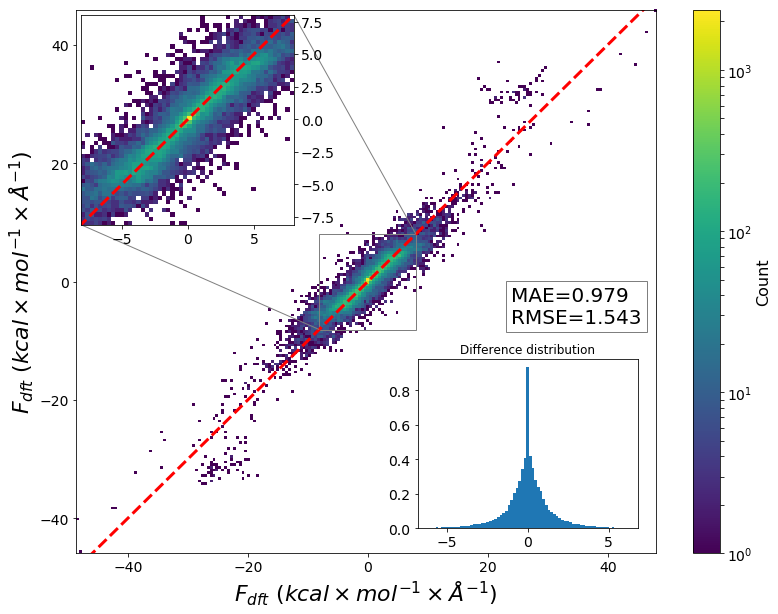

In [16]:
aes.plot_corr_dist(np.concatenate(Fanit),-np.concatenate(Fdftt))